### KNN (K Nearest Neighbors) in Python - Machine Learning From Scratch 01 - Python Tutorial

https://www.youtube.com/watch?v=ngLyX54e1LU&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E

In [31]:
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000','#00FF00', '#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

In [32]:
iris['data'][0:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [39]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [40]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
iris['frame']

In [42]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [45]:
print(X_train.shape)
print(X_train[0])

(120, 4)
[5.1 2.5 3.  1.1]


In [46]:
print(y_train.shape)

(120,)


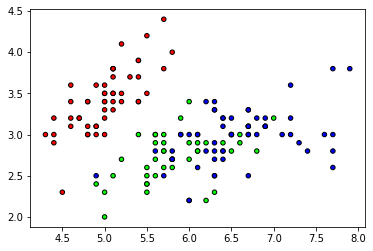

In [47]:
plt.figure()
#We cant draw 3D so we take first 2 features
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=cmap, edgecolor='k', s = 20)
plt.show()

In [48]:
import numpy as np
from collections import Counter

def euclidean_distances(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k = 3):
        self.k = k
    
    # we want to follow conventions of other libraries
    def fit(self, X, y):
        # we store X
        self.X_train = X
        self.Y_train = y
    
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    # only one sample
    def _predict(self, x):
        # compute the distances
        # get k nearest neighbours, labels
        # majority weight : most common class label

        # compute distances
        distances = [euclidean_distances(x, x_train) for x_train in self.X_train]
        # get k nearest neighbours, labels
        k_indices = np.argsort(distances)[0:self.k]
        k_nearest_labels = [self.Y_train[i] for i in k_indices]
        # majority weight : most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]



        

Lets see how above looks like:

In [49]:
a = [1,1,1,2,2,3,4,5,6]
from collections import Counter
most_common = Counter(a).most_common(1)
print(most_common) #first contains the item and 3 represents its count

[(1, 3)]


In [50]:
clf  = KNN(k=3)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

# calculate accuracy

acc = np.sum(predictions == y_test)/len(y_test)
print(f'accuracy: {acc:.6f}')

accuracy: 1.000000


In [51]:
clf  = KNN(k=5)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

# calculate accuracy

acc = np.sum(predictions == y_test)/len(y_test)
print(f'accuracy: {acc:.6f}')

accuracy: 0.966667
